# Ejemplo 2 - Data Science en Internet Movie Database (IMDb)
IMDb es una base de datos en línea que contiene información de películas, programas de televisión, videos caseros, videojuegos y contenido de streaming en línea. Incluye elencos, equipos de producción, biografías personales, resumen de argumentos, trivia, calificaciones y comentarios de fans y críticos

In [1]:
# Importemos las librerías que vamos a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Cargando datos

In [2]:
# Carguemos los datos y visualicemos sus características
df = pd.read_csv('../../data/IMDB.csv', encoding='utf-8')
df.head()

color      director_name  duration        gross  \
0   Color    Martin Scorsese       240  116866727.0   
1   Color        Shane Black       195  408992272.0   
2  color   Quentin Tarantino       187   54116191.0   
3   Color   Kenneth Lonergan       186      46495.0   
4   Color      Peter Jackson       186  258355354.0   

                                 genres                          movie_title  \
0          Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1               Action|Adventure|Sci-Fi                           Iron Man 3   
2  Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                 Drama                             Margaret   
4                     Adventure|Fantasy  The Hobbit: The Desolation of Smaug   

   title_year language country       budget  imdb_score  \
0        2013  English     USA  100000000.0         8.2   
1        2013  English     USA  200000000.0         7.2   
2        2015  English     USA   44000000.0         7.9   
3        2011  English     usa   14000000.0         6.5   
4        2013  English     USA  225000000.0         7.9   

                                              actors  movie_facebook_likes  
0  Leonardo DiCaprio,Matthew McConaughey,Jon Favreau                138000  
1          Robert Downey Jr.,Jon Favreau,Don Cheadle                 95000  
2          Craig Stark,Jennifer Jason Leigh,Zoë Bell                114000  
3        Matt Damon,Kieran Culkin,John Gallagher Jr.                     0  
4              Aidan Turner,Adam Brown,James Nesbitt                 83000

In [3]:
df.describe()

duration         gross   title_year        budget  imdb_score  \
count   99.000000  9.100000e+01    99.000000  9.500000e+01   99.000000   
mean   155.494949  1.541914e+08  1976.444444  1.048570e+08    6.892929   
std     72.797927  1.399503e+08   255.880601  7.703169e+07    1.925514   
min    -50.000000  4.122900e+04   202.000000  1.735000e+04   -7.500000   
25%    138.500000  4.720632e+07  2012.000000  4.000000e+07    6.550000   
50%    143.000000  1.156040e+08  2013.000000  8.000000e+07    7.200000   
75%    155.000000  2.374894e+08  2014.000000  1.740000e+08    7.850000   
max    650.000000  6.232795e+08  2016.000000  2.500000e+08    8.800000   

       movie_facebook_likes  
count             99.000000  
mean           66045.707071  
std            58108.860365  
min                0.000000  
25%            25000.000000  
50%            54000.000000  
75%            85500.000000  
max           349000.000000

In [4]:
df.describe(include=['O'])

color director_name                   genres movie_title language  \
count      88            88                       98          99       99   
unique      3            63                       56          91        1   
top     Color  Ridley Scott  Action|Adventure|Sci-Fi     Ben-Hur  English   
freq       86             4                       10           3       99   

       country                                             actors  
count       99                                                 99  
unique      12                                                 88  
top        USA  Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...  
freq        77                                                  3

El conjunto de datos contiene información de varias películas, cuyas características son:


<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Definición</th>
      <th>Valores</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>color</th>
      <td>Si la película es a color</td>
      <td>Null = No, Color = Si</td>
    </tr>
    <tr>
      <th>director_name</th>
      <td>Nombre del director</td>
      <td></td>
    </tr>
    <tr>
      <th>duration</th>
      <td>Duración en minutos</td>
      <td></td>
    </tr>
    <tr>
      <th>gross</th>
      <td>Ingreso bruto</td>
      <td></td>
    </tr>
    <tr>
      <th>genres</th>
      <td>Géneros de la película</td>
      <td></td>
    </tr>
    <tr>
      <th>movie_title</th>
      <td>Título de la película</td>
      <td></td>
    </tr>
    <tr>
      <th>title_tear</th>
      <td>Año de la película</td>
      <td></td>
    </tr>
    <tr>
      <th>language</th>
      <td>Lenguaje de la película</td>
      <td></td>
    </tr>
    <tr>
      <th>country</th>
      <td>País de la película</td>
      <td></td>
    </tr>
    <tr>
      <th>budget</th>
      <td>Presupuesto de la película</td>
      <td></td>
    </tr>
    <tr>
      <th>imdb_score</th>
      <td>Calificación de la película en IMDb</td>
      <td></td>
    </tr>
    <tr>
      <th>actores</th>
      <td>Lista de los 3 principales actores</td>
      <td></td>
    </tr>
    <tr>
      <th>movie_facebook_likes</th>
      <td>Número de likes en Facebook</td>
      <td></td>
    </tr>
  </tbody>
</table>
</div>

## Limpieza de datos

### Exploración de los datos

In [5]:
# Revisemos si hay datos nulos
df.isnull().values.any()

True

In [6]:
# Revisemos en que columnas hay datos nulos
df.isnull().any()

color                    True
director_name            True
duration                False
gross                    True
genres                   True
movie_title             False
title_year              False
language                False
country                 False
budget                   True
imdb_score              False
actors                  False
movie_facebook_likes    False
dtype: bool

In [7]:
# Obtengamos el número de datos nulos por columna
df.isnull().sum()

color                   11
director_name           11
duration                 0
gross                    8
genres                   1
movie_title              0
title_year               0
language                 0
country                  0
budget                   4
imdb_score               0
actors                   0
movie_facebook_likes     0
dtype: int64

### Eliminar columnas irrelevantes

In [8]:
# Eliminemos las columnas cuya información no es relevante para el análisis
df.drop(['color','language'], axis=1, inplace=True)
df.head(15)

director_name  duration        gross  \
0       Martin Scorsese       240  116866727.0   
1           Shane Black       195  408992272.0   
2     Quentin Tarantino       187   54116191.0   
3      Kenneth Lonergan       186      46495.0   
4         Peter Jackson       186  258355354.0   
5                   NaN       183  330249062.0   
6         Peter Jackson       -50  303001229.0   
7           Edward Hall       180          NaN   
8           Joss Whedon       173  623279547.0   
9           Joss Whedon       173  623279547.0   
10           Tom Tykwer       172   27098580.0   
11                 Null       158  102515793.0   
12  Christopher Spencer       170   59696176.0   
13    Christopher Nolan       169  187991439.0   
14         F. Gary Gray       167  161029270.0   

                                  genres                          movie_title  \
0           Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1                Action|Adventure|Sci-Fi                           Iron Man 3   
2   Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                  Drama                             Margaret   
4                      Adventure|Fantasy  The Hobbit: The Desolation of Smaug   
5                Action|Adventure|Sci-Fi   Batman v Superman: Dawn of Justice   
6                      Adventure|Fantasy    The Hobbit: An Unexpected Journey   
7                          Drama|Romance                             Restless   
8                Action|Adventure|Sci-Fi                         The Avengers   
9                Action|Adventure|Sci-Fi                         The Avengers   
10                          Drama|Sci-Fi                          Cloud Atlas   
11          Crime|Drama|Mystery|Thriller      The Girl with the Dragon Tattoo   
12                                   NaN                           Son of God   
13                Adventure|Drama|Sci-Fi                         Interstellar   
14   Biography|Crime|Drama|History|Music               Straight Outta Compton   

    title_year  country       budget  imdb_score  \
0         2013      USA  100000000.0         8.2   
1         2013      USA  200000000.0         7.2   
2         2015      USA   44000000.0         7.9   
3         2011      usa   14000000.0         6.5   
4         2013      USA  225000000.0         7.9   
5          202      USA  250000000.0         6.9   
6         2012      USA  180000000.0         7.9   
7         2012       UK          NaN         7.2   
8         2012      USA  220000000.0         8.1   
9         2012      USA  220000000.0         8.1   
10        2012  Germany  102000000.0        -7.5   
11        2011      USA   90000000.0         7.8   
12        2014      USA   22000000.0         5.6   
13        2014      USA  165000000.0         8.6   
14        2015      USA   28000000.0         7.9   

                                               actors  movie_facebook_likes  
0   Leonardo DiCaprio,Matthew McConaughey,Jon Favreau                138000  
1           Robert Downey Jr.,Jon Favreau,Don Cheadle                 95000  
2           Craig Stark,Jennifer Jason Leigh,Zoë Bell                114000  
3         Matt Damon,Kieran Culkin,John Gallagher Jr.                     0  
4               Aidan Turner,Adam Brown,James Nesbitt                 83000  
5            Henry Cavill,Lauren Cohan,Alan D. Purwin                197000  
6               Aidan Turner,Adam Brown,James Nesbitt                166000  
7       Rufus Sewell,Hayley Atwell,Charlotte Rampling                   434  
8   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
9   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
10               Tom Hanks,Jim Sturgess,Jim Broadbent                124000  
11        Robin Wright,Goran Visnjic,Joely Richardson                 54000  
12           Roma Downey,Amber Rose Revah,Darwin Shaw            

### Manejar atributos de texto

In [9]:
# Sustituyamos los datos categóricos nulos
df['director_name'].fillna('', inplace=True)
df.head(15)

director_name  duration        gross  \
0       Martin Scorsese       240  116866727.0   
1           Shane Black       195  408992272.0   
2     Quentin Tarantino       187   54116191.0   
3      Kenneth Lonergan       186      46495.0   
4         Peter Jackson       186  258355354.0   
5                             183  330249062.0   
6         Peter Jackson       -50  303001229.0   
7           Edward Hall       180          NaN   
8           Joss Whedon       173  623279547.0   
9           Joss Whedon       173  623279547.0   
10           Tom Tykwer       172   27098580.0   
11                 Null       158  102515793.0   
12  Christopher Spencer       170   59696176.0   
13    Christopher Nolan       169  187991439.0   
14         F. Gary Gray       167  161029270.0   

                                  genres                          movie_title  \
0           Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1                Action|Adventure|Sci-Fi                           Iron Man 3   
2   Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                  Drama                             Margaret   
4                      Adventure|Fantasy  The Hobbit: The Desolation of Smaug   
5                Action|Adventure|Sci-Fi   Batman v Superman: Dawn of Justice   
6                      Adventure|Fantasy    The Hobbit: An Unexpected Journey   
7                          Drama|Romance                             Restless   
8                Action|Adventure|Sci-Fi                         The Avengers   
9                Action|Adventure|Sci-Fi                         The Avengers   
10                          Drama|Sci-Fi                          Cloud Atlas   
11          Crime|Drama|Mystery|Thriller      The Girl with the Dragon Tattoo   
12                                   NaN                           Son of God   
13                Adventure|Drama|Sci-Fi                         Interstellar   
14   Biography|Crime|Drama|History|Music               Straight Outta Compton   

    title_year  country       budget  imdb_score  \
0         2013      USA  100000000.0         8.2   
1         2013      USA  200000000.0         7.2   
2         2015      USA   44000000.0         7.9   
3         2011      usa   14000000.0         6.5   
4         2013      USA  225000000.0         7.9   
5          202      USA  250000000.0         6.9   
6         2012      USA  180000000.0         7.9   
7         2012       UK          NaN         7.2   
8         2012      USA  220000000.0         8.1   
9         2012      USA  220000000.0         8.1   
10        2012  Germany  102000000.0        -7.5   
11        2011      USA   90000000.0         7.8   
12        2014      USA   22000000.0         5.6   
13        2014      USA  165000000.0         8.6   
14        2015      USA   28000000.0         7.9   

                                               actors  movie_facebook_likes  
0   Leonardo DiCaprio,Matthew McConaughey,Jon Favreau                138000  
1           Robert Downey Jr.,Jon Favreau,Don Cheadle                 95000  
2           Craig Stark,Jennifer Jason Leigh,Zoë Bell                114000  
3         Matt Damon,Kieran Culkin,John Gallagher Jr.                     0  
4               Aidan Turner,Adam Brown,James Nesbitt                 83000  
5            Henry Cavill,Lauren Cohan,Alan D. Purwin                197000  
6               Aidan Turner,Adam Brown,James Nesbitt                166000  
7       Rufus Sewell,Hayley Atwell,Charlotte Rampling                   434  
8   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
9   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
10               Tom Hanks,Jim Sturgess,Jim Broadbent                124000  
11        Robin Wright,Goran Visnjic,Joely Richardson                 54000  
12           Roma Downey,Amber Rose Revah,Darwin Shaw            

### Manejar atributos numéricos

In [10]:
# Sustituyamos los datos numéricos nulos
df['gross'].fillna(0, inplace=True)
df['budget'].fillna(0, inplace=True)
df.head(15)

director_name  duration        gross  \
0       Martin Scorsese       240  116866727.0   
1           Shane Black       195  408992272.0   
2     Quentin Tarantino       187   54116191.0   
3      Kenneth Lonergan       186      46495.0   
4         Peter Jackson       186  258355354.0   
5                             183  330249062.0   
6         Peter Jackson       -50  303001229.0   
7           Edward Hall       180          0.0   
8           Joss Whedon       173  623279547.0   
9           Joss Whedon       173  623279547.0   
10           Tom Tykwer       172   27098580.0   
11                 Null       158  102515793.0   
12  Christopher Spencer       170   59696176.0   
13    Christopher Nolan       169  187991439.0   
14         F. Gary Gray       167  161029270.0   

                                  genres                          movie_title  \
0           Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1                Action|Adventure|Sci-Fi                           Iron Man 3   
2   Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                  Drama                             Margaret   
4                      Adventure|Fantasy  The Hobbit: The Desolation of Smaug   
5                Action|Adventure|Sci-Fi   Batman v Superman: Dawn of Justice   
6                      Adventure|Fantasy    The Hobbit: An Unexpected Journey   
7                          Drama|Romance                             Restless   
8                Action|Adventure|Sci-Fi                         The Avengers   
9                Action|Adventure|Sci-Fi                         The Avengers   
10                          Drama|Sci-Fi                          Cloud Atlas   
11          Crime|Drama|Mystery|Thriller      The Girl with the Dragon Tattoo   
12                                   NaN                           Son of God   
13                Adventure|Drama|Sci-Fi                         Interstellar   
14   Biography|Crime|Drama|History|Music               Straight Outta Compton   

    title_year  country       budget  imdb_score  \
0         2013      USA  100000000.0         8.2   
1         2013      USA  200000000.0         7.2   
2         2015      USA   44000000.0         7.9   
3         2011      usa   14000000.0         6.5   
4         2013      USA  225000000.0         7.9   
5          202      USA  250000000.0         6.9   
6         2012      USA  180000000.0         7.9   
7         2012       UK          0.0         7.2   
8         2012      USA  220000000.0         8.1   
9         2012      USA  220000000.0         8.1   
10        2012  Germany  102000000.0        -7.5   
11        2011      USA   90000000.0         7.8   
12        2014      USA   22000000.0         5.6   
13        2014      USA  165000000.0         8.6   
14        2015      USA   28000000.0         7.9   

                                               actors  movie_facebook_likes  
0   Leonardo DiCaprio,Matthew McConaughey,Jon Favreau                138000  
1           Robert Downey Jr.,Jon Favreau,Don Cheadle                 95000  
2           Craig Stark,Jennifer Jason Leigh,Zoë Bell                114000  
3         Matt Damon,Kieran Culkin,John Gallagher Jr.                     0  
4               Aidan Turner,Adam Brown,James Nesbitt                 83000  
5            Henry Cavill,Lauren Cohan,Alan D. Purwin                197000  
6               Aidan Turner,Adam Brown,James Nesbitt                166000  
7       Rufus Sewell,Hayley Atwell,Charlotte Rampling                   434  
8   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
9   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
10               Tom Hanks,Jim Sturgess,Jim Broadbent                124000  
11        Robin Wright,Goran Visnjic,Joely Richardson                 54000  
12           Roma Downey,Amber Rose Revah,Darwin Shaw            

### Unificar nombres de países

In [11]:
# Unifiquemos los nombres de los países, convirtiéndolos a mayusculas y la codificación de USA
df['country']=df['country'].str.upper()
df['country'] = np.where(df['country']=='UNITED STATES','USA', df['country'])
df.head(15)

director_name  duration        gross  \
0       Martin Scorsese       240  116866727.0   
1           Shane Black       195  408992272.0   
2     Quentin Tarantino       187   54116191.0   
3      Kenneth Lonergan       186      46495.0   
4         Peter Jackson       186  258355354.0   
5                             183  330249062.0   
6         Peter Jackson       -50  303001229.0   
7           Edward Hall       180          0.0   
8           Joss Whedon       173  623279547.0   
9           Joss Whedon       173  623279547.0   
10           Tom Tykwer       172   27098580.0   
11                 Null       158  102515793.0   
12  Christopher Spencer       170   59696176.0   
13    Christopher Nolan       169  187991439.0   
14         F. Gary Gray       167  161029270.0   

                                  genres                          movie_title  \
0           Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1                Action|Adventure|Sci-Fi                           Iron Man 3   
2   Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                  Drama                             Margaret   
4                      Adventure|Fantasy  The Hobbit: The Desolation of Smaug   
5                Action|Adventure|Sci-Fi   Batman v Superman: Dawn of Justice   
6                      Adventure|Fantasy    The Hobbit: An Unexpected Journey   
7                          Drama|Romance                             Restless   
8                Action|Adventure|Sci-Fi                         The Avengers   
9                Action|Adventure|Sci-Fi                         The Avengers   
10                          Drama|Sci-Fi                          Cloud Atlas   
11          Crime|Drama|Mystery|Thriller      The Girl with the Dragon Tattoo   
12                                   NaN                           Son of God   
13                Adventure|Drama|Sci-Fi                         Interstellar   
14   Biography|Crime|Drama|History|Music               Straight Outta Compton   

    title_year  country       budget  imdb_score  \
0         2013      USA  100000000.0         8.2   
1         2013      USA  200000000.0         7.2   
2         2015      USA   44000000.0         7.9   
3         2011      USA   14000000.0         6.5   
4         2013      USA  225000000.0         7.9   
5          202      USA  250000000.0         6.9   
6         2012      USA  180000000.0         7.9   
7         2012       UK          0.0         7.2   
8         2012      USA  220000000.0         8.1   
9         2012      USA  220000000.0         8.1   
10        2012  GERMANY  102000000.0        -7.5   
11        2011      USA   90000000.0         7.8   
12        2014      USA   22000000.0         5.6   
13        2014      USA  165000000.0         8.6   
14        2015      USA   28000000.0         7.9   

                                               actors  movie_facebook_likes  
0   Leonardo DiCaprio,Matthew McConaughey,Jon Favreau                138000  
1           Robert Downey Jr.,Jon Favreau,Don Cheadle                 95000  
2           Craig Stark,Jennifer Jason Leigh,Zoë Bell                114000  
3         Matt Damon,Kieran Culkin,John Gallagher Jr.                     0  
4               Aidan Turner,Adam Brown,James Nesbitt                 83000  
5            Henry Cavill,Lauren Cohan,Alan D. Purwin                197000  
6               Aidan Turner,Adam Brown,James Nesbitt                166000  
7       Rufus Sewell,Hayley Atwell,Charlotte Rampling                   434  
8   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
9   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
10               Tom Hanks,Jim Sturgess,Jim Broadbent                124000  
11        Robin Wright,Goran Visnjic,Joely Richardson                 54000  
12           Roma Downey,Amber Rose Revah,Darwin Shaw            

### Arreglando la entrada de datos incorrecta

In [12]:
# Corrijamos la codificación de datos nulos
df['director_name'] = np.where(df['director_name']=='N/A','', df['director_name'])
df['director_name'] = np.where(df['director_name']=='Nan','', df['director_name'])
df['director_name'] = np.where(df['director_name']=='Null','', df['director_name'])
df.head(15)

director_name  duration        gross  \
0       Martin Scorsese       240  116866727.0   
1           Shane Black       195  408992272.0   
2     Quentin Tarantino       187   54116191.0   
3      Kenneth Lonergan       186      46495.0   
4         Peter Jackson       186  258355354.0   
5                             183  330249062.0   
6         Peter Jackson       -50  303001229.0   
7           Edward Hall       180          0.0   
8           Joss Whedon       173  623279547.0   
9           Joss Whedon       173  623279547.0   
10           Tom Tykwer       172   27098580.0   
11                            158  102515793.0   
12  Christopher Spencer       170   59696176.0   
13    Christopher Nolan       169  187991439.0   
14         F. Gary Gray       167  161029270.0   

                                  genres                          movie_title  \
0           Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1                Action|Adventure|Sci-Fi                           Iron Man 3   
2   Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                  Drama                             Margaret   
4                      Adventure|Fantasy  The Hobbit: The Desolation of Smaug   
5                Action|Adventure|Sci-Fi   Batman v Superman: Dawn of Justice   
6                      Adventure|Fantasy    The Hobbit: An Unexpected Journey   
7                          Drama|Romance                             Restless   
8                Action|Adventure|Sci-Fi                         The Avengers   
9                Action|Adventure|Sci-Fi                         The Avengers   
10                          Drama|Sci-Fi                          Cloud Atlas   
11          Crime|Drama|Mystery|Thriller      The Girl with the Dragon Tattoo   
12                                   NaN                           Son of God   
13                Adventure|Drama|Sci-Fi                         Interstellar   
14   Biography|Crime|Drama|History|Music               Straight Outta Compton   

    title_year  country       budget  imdb_score  \
0         2013      USA  100000000.0         8.2   
1         2013      USA  200000000.0         7.2   
2         2015      USA   44000000.0         7.9   
3         2011      USA   14000000.0         6.5   
4         2013      USA  225000000.0         7.9   
5          202      USA  250000000.0         6.9   
6         2012      USA  180000000.0         7.9   
7         2012       UK          0.0         7.2   
8         2012      USA  220000000.0         8.1   
9         2012      USA  220000000.0         8.1   
10        2012  GERMANY  102000000.0        -7.5   
11        2011      USA   90000000.0         7.8   
12        2014      USA   22000000.0         5.6   
13        2014      USA  165000000.0         8.6   
14        2015      USA   28000000.0         7.9   

                                               actors  movie_facebook_likes  
0   Leonardo DiCaprio,Matthew McConaughey,Jon Favreau                138000  
1           Robert Downey Jr.,Jon Favreau,Don Cheadle                 95000  
2           Craig Stark,Jennifer Jason Leigh,Zoë Bell                114000  
3         Matt Damon,Kieran Culkin,John Gallagher Jr.                     0  
4               Aidan Turner,Adam Brown,James Nesbitt                 83000  
5            Henry Cavill,Lauren Cohan,Alan D. Purwin                197000  
6               Aidan Turner,Adam Brown,James Nesbitt                166000  
7       Rufus Sewell,Hayley Atwell,Charlotte Rampling                   434  
8   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
9   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
10               Tom Hanks,Jim Sturgess,Jim Broadbent                124000  
11        Robin Wright,Goran Visnjic,Joely Richardson                 54000  
12           Roma Downey,Amber Rose Revah,Darwin Shaw            

### Manejo de valores atípicos

In [13]:
# Cambiemos los datos numéricos a float
df["gross"]=df["gross"].astype(float)
df["duration"]=df["duration"].astype(float)
df["budget"]=df["budget"].astype(float)

# Eliminemos datos atípicos:
# Duraciones de películas menores a 10 minutos y mayores a 300 minutos
# Calificaciones IMDb negativas
# Años anteriores a 2010
df['duration'] = np.where(df['duration']<=10,0, df['duration'])
df['duration'] = np.where(df['duration']>300,0, df['duration'])
df['imdb_score'] = np.where(df['imdb_score']<=0,0, df['imdb_score'])
df['title_year'] = np.where(df['title_year']<2010,0, df['title_year'])
df.head(15)

director_name  duration        gross  \
0       Martin Scorsese     240.0  116866727.0   
1           Shane Black     195.0  408992272.0   
2     Quentin Tarantino     187.0   54116191.0   
3      Kenneth Lonergan     186.0      46495.0   
4         Peter Jackson     186.0  258355354.0   
5                           183.0  330249062.0   
6         Peter Jackson       0.0  303001229.0   
7           Edward Hall     180.0          0.0   
8           Joss Whedon     173.0  623279547.0   
9           Joss Whedon     173.0  623279547.0   
10           Tom Tykwer     172.0   27098580.0   
11                          158.0  102515793.0   
12  Christopher Spencer     170.0   59696176.0   
13    Christopher Nolan     169.0  187991439.0   
14         F. Gary Gray     167.0  161029270.0   

                                  genres                          movie_title  \
0           Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1                Action|Adventure|Sci-Fi                           Iron Man 3   
2   Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                  Drama                             Margaret   
4                      Adventure|Fantasy  The Hobbit: The Desolation of Smaug   
5                Action|Adventure|Sci-Fi   Batman v Superman: Dawn of Justice   
6                      Adventure|Fantasy    The Hobbit: An Unexpected Journey   
7                          Drama|Romance                             Restless   
8                Action|Adventure|Sci-Fi                         The Avengers   
9                Action|Adventure|Sci-Fi                         The Avengers   
10                          Drama|Sci-Fi                          Cloud Atlas   
11          Crime|Drama|Mystery|Thriller      The Girl with the Dragon Tattoo   
12                                   NaN                           Son of God   
13                Adventure|Drama|Sci-Fi                         Interstellar   
14   Biography|Crime|Drama|History|Music               Straight Outta Compton   

    title_year  country       budget  imdb_score  \
0         2013      USA  100000000.0         8.2   
1         2013      USA  200000000.0         7.2   
2         2015      USA   44000000.0         7.9   
3         2011      USA   14000000.0         6.5   
4         2013      USA  225000000.0         7.9   
5            0      USA  250000000.0         6.9   
6         2012      USA  180000000.0         7.9   
7         2012       UK          0.0         7.2   
8         2012      USA  220000000.0         8.1   
9         2012      USA  220000000.0         8.1   
10        2012  GERMANY  102000000.0         0.0   
11        2011      USA   90000000.0         7.8   
12        2014      USA   22000000.0         5.6   
13        2014      USA  165000000.0         8.6   
14        2015      USA   28000000.0         7.9   

                                               actors  movie_facebook_likes  
0   Leonardo DiCaprio,Matthew McConaughey,Jon Favreau                138000  
1           Robert Downey Jr.,Jon Favreau,Don Cheadle                 95000  
2           Craig Stark,Jennifer Jason Leigh,Zoë Bell                114000  
3         Matt Damon,Kieran Culkin,John Gallagher Jr.                     0  
4               Aidan Turner,Adam Brown,James Nesbitt                 83000  
5            Henry Cavill,Lauren Cohan,Alan D. Purwin                197000  
6               Aidan Turner,Adam Brown,James Nesbitt                166000  
7       Rufus Sewell,Hayley Atwell,Charlotte Rampling                   434  
8   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
9   Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...                123000  
10               Tom Hanks,Jim Sturgess,Jim Broadbent                124000  
11        Robin Wright,Goran Visnjic,Joely Richardson                 54000  
12           Roma Downey,Amber Rose Revah,Darwin Shaw            

### División de datos

In [14]:
# Separemos los datos de los actores en 3 columnas
actor_list = df["actors"].str.split(",", n = 2, expand = True) # n : max index
df["actor1"]= actor_list[0]
df["actor2"]= actor_list[1]
df["actor3"]= actor_list[2]
df.drop(columns=['actors'], inplace=True)
df.head(15)

director_name  duration        gross  \
0       Martin Scorsese     240.0  116866727.0   
1           Shane Black     195.0  408992272.0   
2     Quentin Tarantino     187.0   54116191.0   
3      Kenneth Lonergan     186.0      46495.0   
4         Peter Jackson     186.0  258355354.0   
5                           183.0  330249062.0   
6         Peter Jackson       0.0  303001229.0   
7           Edward Hall     180.0          0.0   
8           Joss Whedon     173.0  623279547.0   
9           Joss Whedon     173.0  623279547.0   
10           Tom Tykwer     172.0   27098580.0   
11                          158.0  102515793.0   
12  Christopher Spencer     170.0   59696176.0   
13    Christopher Nolan     169.0  187991439.0   
14         F. Gary Gray     167.0  161029270.0   

                                  genres                          movie_title  \
0           Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1                Action|Adventure|Sci-Fi                           Iron Man 3   
2   Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                  Drama                             Margaret   
4                      Adventure|Fantasy  The Hobbit: The Desolation of Smaug   
5                Action|Adventure|Sci-Fi   Batman v Superman: Dawn of Justice   
6                      Adventure|Fantasy    The Hobbit: An Unexpected Journey   
7                          Drama|Romance                             Restless   
8                Action|Adventure|Sci-Fi                         The Avengers   
9                Action|Adventure|Sci-Fi                         The Avengers   
10                          Drama|Sci-Fi                          Cloud Atlas   
11          Crime|Drama|Mystery|Thriller      The Girl with the Dragon Tattoo   
12                                   NaN                           Son of God   
13                Adventure|Drama|Sci-Fi                         Interstellar   
14   Biography|Crime|Drama|History|Music               Straight Outta Compton   

    title_year  country       budget  imdb_score  movie_facebook_likes  \
0         2013      USA  100000000.0         8.2                138000   
1         2013      USA  200000000.0         7.2                 95000   
2         2015      USA   44000000.0         7.9                114000   
3         2011      USA   14000000.0         6.5                     0   
4         2013      USA  225000000.0         7.9                 83000   
5            0      USA  250000000.0         6.9                197000   
6         2012      USA  180000000.0         7.9                166000   
7         2012       UK          0.0         7.2                   434   
8         2012      USA  220000000.0         8.1                123000   
9         2012      USA  220000000.0         8.1                123000   
10        2012  GERMANY  102000000.0         0.0                124000   
11        2011      USA   90000000.0         7.8                 54000   
12        2014      USA   22000000.0         5.6                 15000   
13        2014      USA  165000000.0         8.6                349000   
14        2015      USA   28000000.0         7.9                 76000   

                 actor1                actor2              actor3  
0     Leonardo DiCaprio   Matthew McConaughey         Jon Favreau  
1     Robert Downey Jr.           Jon Favreau         Don Cheadle  
2           Craig Stark  Jennifer Jason Leigh            Zoë Bell  
3            Matt Damon         Kieran Culkin  John Gallagher Jr.  
4          Aidan Turner            Adam Brown       James Nesbitt  
5          Henry Cavill          Lauren Cohan      Alan D. Purwin  
6          Aidan Turner            Adam Brown       James Nesbitt  
7          Rufus Sewell         Hayley Atwell  Charlotte Rampling  
8       Chris Hemsworth     Robert Downey Jr.  Scarlett Johansson  
9       Chris Hemsworth     Robert Downey Jr.  

### Crear una nueva métrica: ingreso bruto sobre presupuesto

In [15]:
# Generemos la nueva métrica
df['GOB'] = df.apply(lambda row: row['gross']/row['budget'] if row['budget']!=0 else 0, axis=1)
df.head(15)

director_name  duration        gross  \
0       Martin Scorsese     240.0  116866727.0   
1           Shane Black     195.0  408992272.0   
2     Quentin Tarantino     187.0   54116191.0   
3      Kenneth Lonergan     186.0      46495.0   
4         Peter Jackson     186.0  258355354.0   
5                           183.0  330249062.0   
6         Peter Jackson       0.0  303001229.0   
7           Edward Hall     180.0          0.0   
8           Joss Whedon     173.0  623279547.0   
9           Joss Whedon     173.0  623279547.0   
10           Tom Tykwer     172.0   27098580.0   
11                          158.0  102515793.0   
12  Christopher Spencer     170.0   59696176.0   
13    Christopher Nolan     169.0  187991439.0   
14         F. Gary Gray     167.0  161029270.0   

                                  genres                          movie_title  \
0           Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1                Action|Adventure|Sci-Fi                           Iron Man 3   
2   Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                  Drama                             Margaret   
4                      Adventure|Fantasy  The Hobbit: The Desolation of Smaug   
5                Action|Adventure|Sci-Fi   Batman v Superman: Dawn of Justice   
6                      Adventure|Fantasy    The Hobbit: An Unexpected Journey   
7                          Drama|Romance                             Restless   
8                Action|Adventure|Sci-Fi                         The Avengers   
9                Action|Adventure|Sci-Fi                         The Avengers   
10                          Drama|Sci-Fi                          Cloud Atlas   
11          Crime|Drama|Mystery|Thriller      The Girl with the Dragon Tattoo   
12                                   NaN                           Son of God   
13                Adventure|Drama|Sci-Fi                         Interstellar   
14   Biography|Crime|Drama|History|Music               Straight Outta Compton   

    title_year  country       budget  imdb_score  movie_facebook_likes  \
0         2013      USA  100000000.0         8.2                138000   
1         2013      USA  200000000.0         7.2                 95000   
2         2015      USA   44000000.0         7.9                114000   
3         2011      USA   14000000.0         6.5                     0   
4         2013      USA  225000000.0         7.9                 83000   
5            0      USA  250000000.0         6.9                197000   
6         2012      USA  180000000.0         7.9                166000   
7         2012       UK          0.0         7.2                   434   
8         2012      USA  220000000.0         8.1                123000   
9         2012      USA  220000000.0         8.1                123000   
10        2012  GERMANY  102000000.0         0.0                124000   
11        2011      USA   90000000.0         7.8                 54000   
12        2014      USA   22000000.0         5.6                 15000   
13        2014      USA  165000000.0         8.6                349000   
14        2015      USA   28000000.0         7.9                 76000   

                 actor1                actor2              actor3       GOB  
0     Leonardo DiCaprio   Matthew McConaughey         Jon Favreau  1.168667  
1     Robert Downey Jr.           Jon Favreau         Don Cheadle  2.044961  
2           Craig Stark  Jennifer Jason Leigh            Zoë Bell  1.229913  
3            Matt Damon         Kieran Culkin  John Gallagher Jr.  0.003321  
4          Aidan Turner            Adam Brown       James Nesbitt  1.148246  
5          Henry Cavill          Lauren Cohan      Alan D. Purwin  1.320996  
6          Aidan Turner            Adam Brown       James Nesbitt  1.683340  
7          Rufus Sewell         Hayley Atwell  Charlotte Rampling  0.000000  
8       Chris Hemsworth  

In [16]:
# Veamos cuales son las películas con el valor más alto
top_GOB=df.sort_values('GOB',ascending=False).head(10)
print(top_GOB)

        director_name  duration        gross  \
43        Tate Taylor     146.0  169705587.0   
15  Richard Linklater     165.0   25359200.0   
14       F. Gary Gray     167.0  161029270.0   
59                        142.0  407999255.0   
75                        138.0  150117807.0   
44   Francis Lawrence     146.0  424645577.0   
76    Robert Zemeckis     138.0   93749203.0   
94      Steve McQueen     134.0   56667870.0   
8         Joss Whedon     173.0  623279547.0   
9         Joss Whedon     173.0  623279547.0   

                                 genres                      movie_title  \
43                                Drama                         The Help   
15                                Drama                          Boyhood   
14  Biography|Crime|Drama|History|Music           Straight Outta Compton   
59      Adventure|Drama|Sci-Fi|Thriller                 The Hunger Games   
75                          Crime|Drama                  American Hustle   
44            A

### Guardar los datos

In [17]:
df.to_csv(r'../../data/new_IMDB.csv', index=None)

### Análisis de datos

In [18]:
# Leamos los datos guardados en un dataframe
df_imdb = pd.read_csv('../../data/new_IMDB.csv')
df_imdb.head()

director_name  duration        gross  \
0    Martin Scorsese     240.0  116866727.0   
1        Shane Black     195.0  408992272.0   
2  Quentin Tarantino     187.0   54116191.0   
3   Kenneth Lonergan     186.0      46495.0   
4      Peter Jackson     186.0  258355354.0   

                                 genres                          movie_title  \
0          Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1               Action|Adventure|Sci-Fi                           Iron Man 3   
2  Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                 Drama                             Margaret   
4                     Adventure|Fantasy  The Hobbit: The Desolation of Smaug   

   title_year country       budget  imdb_score  movie_facebook_likes  \
0        2013     USA  100000000.0         8.2                138000   
1        2013     USA  200000000.0         7.2                 95000   
2        2015     USA   44000000.0         7.9                114000   
3        2011     USA   14000000.0         6.5                     0   
4        2013     USA  225000000.0         7.9                 83000   

              actor1                actor2              actor3       GOB  
0  Leonardo DiCaprio   Matthew McConaughey         Jon Favreau  1.168667  
1  Robert Downey Jr.           Jon Favreau         Don Cheadle  2.044961  
2        Craig Stark  Jennifer Jason Leigh            Zoë Bell  1.229913  
3         Matt Damon         Kieran Culkin  John Gallagher Jr.  0.003321  
4       Aidan Turner            Adam Brown       James Nesbitt  1.148246

### Explorar los Datos

In [ ]:
#import  qgrid
#qgrid = qgrid.show_grid(df_imdb, show_toolbar=True)
#qgrid


### Directores cuyas películas tienen el mayor de ingresos brutos con respecto a su presupuesto (GOB):

In [19]:
# Ordenemos los datos por GOB
top_GOB = df_imdb.sort_values('GOB',ascending=False).head(15)

In [21]:
# Obtengamos el apellido del director
top_GOB['director_familyName'] = df_imdb["director_name"].str.split(" ", n = 2, expand = True) [1]
top_GOB

director_name  duration        gross  \
43          Tate Taylor     146.0  169705587.0   
15    Richard Linklater     165.0   25359200.0   
14         F. Gary Gray     167.0  161029270.0   
59                  NaN     142.0  407999255.0   
75                  NaN     138.0  150117807.0   
44     Francis Lawrence     146.0  424645577.0   
76      Robert Zemeckis     138.0   93749203.0   
94        Steve McQueen     134.0   56667870.0   
8           Joss Whedon     173.0  623279547.0   
9           Joss Whedon     173.0  623279547.0   
32                  NaN     150.0  182204440.0   
35        David Fincher     149.0  167735396.0   
12  Christopher Spencer     170.0   59696176.0   
21           Tom Hooper     158.0  148775460.0   
20           Tom Hooper     158.0  148775460.0   

                                 genres                      movie_title  \
43                                Drama                         The Help   
15                                Drama                          Boyhood   
14  Biography|Crime|Drama|History|Music           Straight Outta Compton   
59      Adventure|Drama|Sci-Fi|Thriller                 The Hunger Games   
75                          Crime|Drama                  American Hustle   
44            Adventure|Sci-Fi|Thriller  The Hunger Games: Catching Fire   
76                       Drama|Thriller                           Flight   
94              Biography|Drama|History                 12 Years a Slave   
8               Action|Adventure|Sci-Fi                     The Avengers   
9               Action|Adventure|Sci-Fi                     The Avengers   
32          Biography|Drama|History|War                          Lincoln   
35         Crime|Drama|Mystery|Thriller                        Gone Girl   
12                                  NaN                       Son of God   
21                Drama|Musical|Romance                   Les Misérables   
20                Drama|Musical|Romance                   Les Misérables   

    title_year country       budget  imdb_score  movie_facebook_likes  \
43        2011     USA   25000000.0         8.1                 75000   
15        2014     USA    4000000.0         8.0                 92000   
14        2015     USA   28000000.0         7.9                 76000   
59        2012     USA   78000000.0         7.3                140000   
75        2013     USA   40000000.0         7.3                 63000   
44        2013     USA  130000000.0         7.6                 82000   
76        2012     USA   31000000.0         7.3                 64000   
94        2013     USA   20000000.0         8.1                 83000   
8         2012     USA  220000000.0         8.1                123000   
9         2012     USA  220000000.0         8.1                123000   
32        2012     USA   65000000.0         7.4                 71000   
35        2014     USA   61000000.0         8.1                146000   
12        2014     USA   22000000.0         5.6                 15000   
21        2012     USA   61000000.0         7.6                144000   
20        2012     USA   61000000.0         7.6                144000   

                  actor1               actor2                 actor3  \
43            Emma Stone  Bryce Dallas Howard             Mike Vogel   
15        Ellar Coltrane    Lorelei Linklater          Libby Villari   
14           Aldis Hodge       Neil Brown Jr.       R. Marcos Taylor   
59     Jennifer Lawrence      Josh Hutcherson       Anthony Reynolds   
75     Jennifer Lawrence       Christian Bale         Bradley Cooper   
44     Jennifer Lawrence      Josh Hutcherson  Sandra Ellis Lafferty   
76     Denzel Washington      Bruce Greenwood       Nadine Velazquez   
94     Quvenzhané Wallis        Scoot McNairy           Taran Killam   
8        Chris Hemsworth    Robert Downey Jr.     Scarlett Johansson   
9        Chris Hemsworth    Robert Downey Jr.     Scarlett Johansson   
32  Joseph Gordon-Levitt       

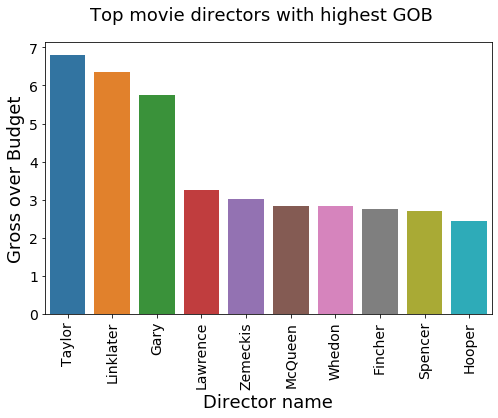

In [22]:
# Grafiquemos los datos
fig,ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x="director_familyName", y="GOB", data=top_GOB)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle('Top movie directors with highest GOB', fontsize=18)
ax.set_xlabel('Director name',fontsize=18)
ax.set_ylabel('Gross over Budget',fontsize=18)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

### Agrupación de películas
Revisaremos si la calificación IMDb tiene alguna relación con los ingresos brutos con respecto al presupuesto.
De esta manera, podemos predecir los ingresos brutos que tendrá una nueva película

In [23]:
# Obtengamos ambas columnas
df_c=df_imdb.loc[(df_imdb['GOB']>0) & df_imdb['imdb_score']>0][['imdb_score','GOB']]
df_c.head()

imdb_score       GOB
0         8.2  1.168667
1         7.2  2.044961
2         7.9  1.229913
3         6.5  0.003321
4         7.9  1.148246

In [24]:
# Importemos las librerías que vamos a utilizar
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

### Método Elbow

Text(0.5, 1.0, 'Selecting the best K')

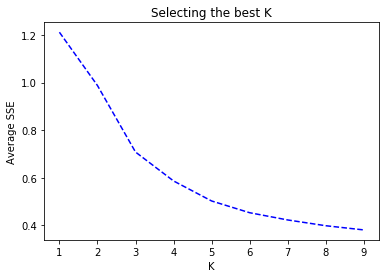

In [25]:
# Apliquemos un algoritmo de Kmeans para determinar en cuantos grupos se puede dividor la información
K = range(1, 10)
meandist = []
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df_c)
    meandist.append(sum(np.min(cdist(df_c, km.cluster_centers_,'euclidean'), axis=1)) / df_c.shape[0])
plt.plot(K, meandist, '--', color='blue')
plt.xlabel('K')
plt.ylabel('Average SSE')
plt.title('Selecting the best K')

### Centroides

In [26]:
# Como se observa en la gráfica, el número óptimo de grupos es 3
# Utilicemos este valor para definir los centroides y entrenar el modelo
km_ = KMeans(n_clusters=3)
km_.fit(df_c)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
# Despleguemos los resultados del entrenamiento
centroids=km_.cluster_centers_
labels = km_.labels_

In [28]:
print(centroids)
print(labels)

[[7.77111111 1.79254747]
 [6.40789474 0.83505584]
 [7.825      6.02745713]]
[0 0 0 1 0 1 0 0 0 0 1 0 2 2 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 1 2 0 0 0 1 1 1 1 0 0 0 0 0 0 1 2 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 0 0 1]


### Graficar los centroides

Text(0.5, 0, 'IMDB Score')

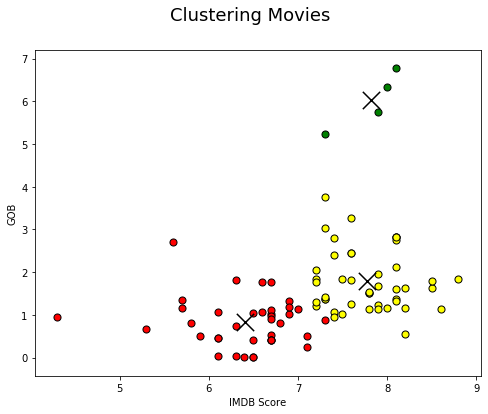

In [29]:
# Grafiquemos los grupos generados
fig = plt.figure(figsize=(8,6))
colors = ["yellow","red","green"]
df_array = np.array(df_c)

for i in range(len(df_array)):
    plt.scatter(df_array[i][0],df_array[i][1],c=colors[labels[i]],s=50,marker='o',edgecolors='black')

plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='black',s=300)
fig.suptitle('Clustering Movies', fontsize=18)
plt.ylabel('GOB')
plt.xlabel('IMDB Score')

## Relación entre la calificación IMDb Score y los likes en Facebook
Revisaremos si la calificación IMDb tiene alguna relación con los likes en Facebook.  
De esta manera, podemos predecir los likes que tendrá una nueva película

In [30]:
# Se rescalan los datos de los likes, para que esten en una escala similar a la de la calificación IMDb
df_imdb['movie_facebook_likes']=df_imdb['movie_facebook_likes'].apply(lambda row: row/10000)

### Regresion Lineal con Seaborn

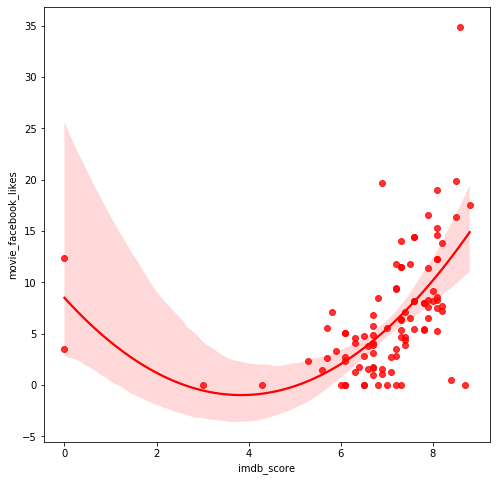

In [31]:
# Utilicemos la función preconstruída de Seaborn, para realizar una regresión linear entre la calificación IMDb
# y los likes de Facebook
fig = plt.figure(figsize=(8,8))
sns.regplot('imdb_score', 'movie_facebook_likes', df_imdb, fit_reg=True,order=2,color='red')

### Regresión Lineal para predecir la calificación IMDb

In [32]:
# Asignemos la calificación IMDb como característica y los likes de Facebook como valor a predecir
X = df_imdb['imdb_score'].values[:,np.newaxis]
y = df_imdb['movie_facebook_likes'].values

In [33]:
# Importemos las librerías a utilizar
from sklearn.linear_model import LinearRegression

In [34]:
# Generemos un modelo de regresión lineal
lr = LinearRegression()

In [35]:
# Entrenemos el modelo con los datos
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicción:

In [36]:
# Hagamos la predicción de un nuevo dato
IMDB_score=8.8
X_test=np.array([IMDB_score]).reshape(1,-1)
X_test

array([[8.8]])

In [37]:
y_pred = lr.predict(X_test)
print(f"Facebook likes estimation (10k) for a IMDB score:{IMDB_score}-->{y_pred}")

Facebook likes estimation (10k) for a IMDB score:8.8-->[9.34539641]


#### Graficar el modelo y la predicción

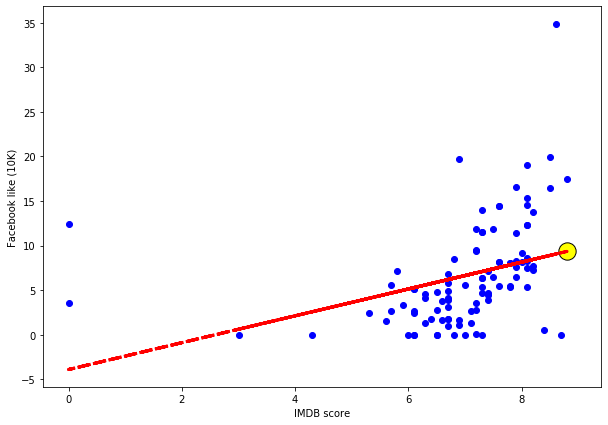

In [38]:
# Grafiquemos los resultados
fig,ax = plt.subplots(figsize=(10, 7))

plt.xlabel('IMDB score');
plt.ylabel('Facebook like (10K)');

plt.scatter(X, y,color='blue')
plt.plot(X, lr.predict(X), color='red', linestyle='--', lw=3)

plt.scatter(X_test, y_pred, color='yellow', s=300, edgecolors='black')